## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.  
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.  
Будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.  

**Описание данных:**  
Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.  
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма, столбец включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.  

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
# Импорт необходимых библиотек и настроек
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Чтение файлов
# данные о прокатных удостоверениях.
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
display(df_movies.head())
# данные о прокате в российских кинотеатрах.
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')
display(df_shows.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [3]:
# посмотрим информацию по датафрейму df_movies
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [4]:
# посмотрим информацию по датафрейму df_shows
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Объединим датафреймы по общему столбцу `puNumber`, предварительно преобразуем столбец в `df_movies` к `int`

In [5]:
df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'], errors='coerce').fillna(0).astype('int')
df = df_movies.merge(df_shows, on='puNumber', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.2+ KB


In [6]:
# преобразуем столбец puNumber к camel_case стилю
df = df.rename(columns={'puNumber': 'pu_number'})

**Таблица `df` содержит информацию из реестра прокатных удостоверений.  
У одного фильма может быть несколько прокатных удостоверений.**
- `title` — название фильма;
- `pu_number` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма, включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.
- `box_office` — сборы в рублях.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
pu_number                7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.2+ KB


**Преобразуем столбцы:**
- `show_start_date` к date, дата премьеры
- `box_office` к int, поскольку float точность нам не важна
- `ratings` к float



In [8]:
# show_start_date
df['show_start_date'] = pd.to_datetime(pd.to_datetime(df['show_start_date']).apply(lambda x: x.strftime('%Y-%m-%d')))

In [9]:
# box_office
df['box_office'] = pd.to_numeric(df['box_office'], errors='coerce').fillna(0).astype('int')

In [10]:
# ratings
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [11]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce').fillna(0)
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [12]:
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",0
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",0
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",0
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",0
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",0


**Вывод:**  
Данные были преобразованы к типам согласно документации.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [13]:
round(df.isna().sum()/len(df)*100,2)

title                     0.00
pu_number                 0.00
show_start_date           0.00
type                      0.00
film_studio               0.24
production_country        0.03
director                  0.12
producer                  7.59
age_restriction           0.00
refundable_support       95.57
nonrefundable_support    95.57
budget                   95.57
financing_source         95.57
ratings                   0.00
genres                   13.04
box_office                0.00
dtype: float64

In [14]:
df.isna().mean() * 100

title                     0.000000
pu_number                 0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.240449
production_country        0.026717
director                  0.120224
producer                  7.587497
age_restriction           0.000000
refundable_support       95.565055
nonrefundable_support    95.565055
budget                   95.565055
financing_source         95.565055
ratings                   0.000000
genres                   13.037670
box_office                0.000000
dtype: float64

In [15]:
df['show_start_date']# заполним пропуски в столбцах режиссер и жанр значением 'нет данных'
df['director'] = df['director'].fillna('нет данных')
df['genres'] = df['genres'].fillna('нет данных')

Сделаю предположение, что заполнение пропусков в столбцах `film_studio`, `production_country`, `producer`, `genres` ни на что не повлияет и их можно пропустить, в случае необходимости информацию можно распарсить с сайта Кинопоиска, либо заполнить пропуски значением `'Не определено'`.

Данные в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` заполнены только для фильмов с государственной поддержкой, так что пропуски для остальных корректны.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [16]:
df.loc[df.duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**Вывод:**  
Дубликаты в датафрейме отсутствуют.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [17]:
# посмотрим на категорийные данные
df.describe(include='object')

,title,type,film_studio,production_country,director,producer,age_restriction,financing_source,genres
count,7486,7486,7468,7484,7486,6918,7486,332,7486
unique,6772,8,5490,950,4812,5349,5,3,743
top,День святого Валентина_,Художественный,"Киностудия ""Мосфильм""",США,О.Семёнова,П.Смирнов,«16+» - для детей старше 16 лет,Министерство культуры,нет данных
freq,5,4520,341,2172,47,67,2851,164,976


In [18]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Проанализировав столбец `type` мы видим, что в данных присутствуют ведущие нули, приведем данные всех столбцов с типом **object** к нижнему регистру и удалим ведущие и конечные пробелы строки, только если данное преобразование сократит количество уникальных значений.

In [19]:
for col in df.columns:
    if df.dtypes[col] == 'object':
        unique_before = df[col].value_counts().count()
        unique_after = df[col].str.lower().str.strip().value_counts().count()
        if unique_before != unique_after:
            df[col] = df[col].str.lower().str.strip()
            print('Отформатировали данные столбца =',col)
            print('Количество уникальных значений до преобразования =', unique_before)
            print('Количество уникальных значений после преобразования =', unique_after)

Отформатировали данные столбца = title
Количество уникальных значений до преобразования = 6772
Количество уникальных значений после преобразования = 6762
Отформатировали данные столбца = type
Количество уникальных значений до преобразования = 8
Количество уникальных значений после преобразования = 6
Отформатировали данные столбца = film_studio
Количество уникальных значений до преобразования = 5490
Количество уникальных значений после преобразования = 5422
Отформатировали данные столбца = production_country
Количество уникальных значений до преобразования = 950
Количество уникальных значений после преобразования = 933
Отформатировали данные столбца = director
Количество уникальных значений до преобразования = 4812
Количество уникальных значений после преобразования = 4797
Отформатировали данные столбца = producer
Количество уникальных значений до преобразования = 5349
Количество уникальных значений после преобразования = 5326


In [20]:
# посмотрим на категорийные данные после преобразований
df.describe(include='object')

,title,type,film_studio,production_country,director,producer,age_restriction,financing_source,genres
count,7486,7486,7468,7484,7486,6918,7486,332,7486
unique,6762,6,5422,933,4797,5326,5,3,743
top,день святого валентина_,художественный,"киностудия ""мосфильм""",сша,о.семёнова,п.смирнов,«16+» - для детей старше 16 лет,Министерство культуры,нет данных
freq,5,5909,345,2175,60,67,2851,164,976


**Вывод:**  
Данные привели к нижнему регистру и убрали ведущие и конечные пробелы, если они есть. Тем самым сократили количество уникальных значений по столбцам.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [21]:
# посмотрим на количественные данные
df[['budget', 'refundable_support', 'nonrefundable_support', 'box_office']].describe().astype('int')

,budget,refundable_support,nonrefundable_support,box_office
count,332,332,332,7486
mean,127229716,11864457,48980988,32262853
std,188588333,24916555,59980117,160600784
min,0,0,0,0
25%,42000000,0,25000000,0
50%,68649916,0,30000000,0
75%,141985319,15000000,40375000,1080467
max,2305074303,180000000,400000000,3073568690


In [22]:
# исправим строки которые не удовлетворяют условию из документации,
# budget = refundable_support + nonrefundable_support
df.loc[(df['financing_source'].notna()) & 
       (df['budget'] < df['refundable_support'] + df['nonrefundable_support']), 'budget'] = df['refundable_support'] + df['nonrefundable_support']

**Посмотрим на результат после перерасчета бюджетных данных.**

In [23]:
display(df.loc[(df['financing_source'].notna()) & 
       (df['budget'] < df['refundable_support'] + df['nonrefundable_support'])])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**Вывод:**  
Бюджетные данные заполнены недостающими значениями.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [24]:
df['show_start_date_year'] = pd.DatetimeIndex(df['show_start_date']).year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [25]:
df['main_director'] = df['director'].apply(lambda x: x.split(',')[0])

In [26]:
df['main_genres'] = df['genres'].apply(lambda x: x.split(',')[0])

In [27]:
df['director'].str.split(',').str[0]

0           кевин костнер
1               е.матвеев
2       тимур бекмамбетов
3       тимур бекмамбетов
4       тимур бекмамбетов
              ...        
7481          фил грабски
7482           ник пауэлл
7483     чарльз е.бастьен
7484             а.беляев
7485             и.трусов
Name: director, Length: 7486, dtype: object

In [28]:
# посмотрим на новые столбцы
df[['show_start_date', 'show_start_date_year',
    'director', 'main_director',
    'genres', 'main_genres']].head()

,show_start_date,show_start_date_year,director,main_director,genres,main_genres
0,2015-11-27,2015,кевин костнер,кевин костнер,"боевик,драма,мелодрама",боевик
1,2016-09-13,2016,е.матвеев,е.матвеев,"драма,военный",драма
2,2016-10-10,2016,тимур бекмамбетов,тимур бекмамбетов,"фантастика,боевик,триллер",фантастика
3,2016-06-10,2016,тимур бекмамбетов,тимур бекмамбетов,"фантастика,боевик,триллер",фантастика
4,2015-07-29,2015,тимур бекмамбетов,тимур бекмамбетов,"фантастика,боевик,триллер",фантастика


In [29]:
df['proportion_state_support'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']
df['proportion_state_support'].describe()

count    332.000000
mean       0.542098
std        0.196925
min        0.044043
25%        0.384615
50%        0.614038
75%        0.661412
max        1.000000
Name: proportion_state_support, dtype: float64

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Государственная поддержка составляет долю от 4 до 100%, среднее значение 54%, медианное 61%.

**Вывод:**  
Созданы дополнительные столбцы для дальнейших исследований.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

,box_office
show_start_date_year,
2010,985
2019,930
2018,891
2016,818
2014,807
2015,705
2013,630
2011,622
2012,593


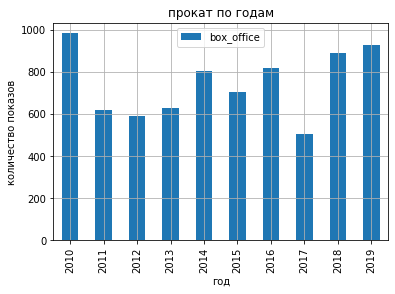

Фильмов с указанной информацией о прокате в кинотеатрах: 41.86%


In [30]:
# прокат по годам
count_per_year = df.pivot_table(index='show_start_date_year', values='box_office', aggfunc='count')
display(count_per_year.sort_values('box_office', ascending=False))
count_per_year.plot(kind='bar', grid=True, title='прокат по годам')
plt.xlabel('год')
plt.ylabel('количество показов')
plt.show()

cnt = df.loc[df['box_office'] > 0]['box_office'].count() / df['box_office'].count()
print(f'Фильмов с указанной информацией о прокате в кинотеатрах: {cnt:.2%}')

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

,box_office
show_start_date_year,
2010,2.43
2011,14.10
2012,6.96
2013,29.80
2014,7444.95
2015,39497.37
2016,47866.30
2017,48563.71
2018,49668.40


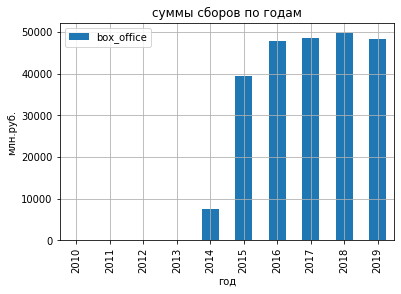

In [31]:
# суммы сборов по годам
box_office_per_year = df.pivot_table(index='show_start_date_year', values='box_office', aggfunc='sum')
box_office_per_year = round(box_office_per_year/1000000,2)
display(box_office_per_year)
box_office_per_year.plot(kind='bar', grid=True, title='суммы сборов по годам')
plt.xlabel('год')
plt.ylabel('млн.руб.')
plt.show()

До 2015 мало данных, с 2015 произошел стремительный рост, максимальное значение в 2018 почти 50млрд.руб.  
Минимальное значение было в 2010 2.43 млн.руб.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [32]:
df_not_null = df.query('box_office > 0')
df_not_null.pivot_table(index='show_start_date_year', values='box_office', aggfunc=('mean', 'median', 'sum')).astype('int')


,mean,median,sum
show_start_date_year,,,
2010,24046,1710,2428654
2011,129383,3000,14102765
2012,56548,6220,6955423
2013,166478,3580,29799704
2014,27270885,20400,7444951839
2015,85492132,5003449,39497365062
2016,91173903,3915041,47866299596
2017,136032793,9968340,48563707214
2018,104565058,8891102,49668402949


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

sum  \
age_restriction      «0+» - для любой зрительской аудитории   
show_start_date_year                                          
2015                                                    362   
2016                                                    135   
2017                                                    228   
2018                                                     31   
2019                                                     16   

                                                      \
age_restriction      «12+» - для детей старше 12 лет   
show_start_date_year                                   
2015                                           13586   
2016                                           12168   
2017                                            7835   
2018                                           14236   
2019                                           12638   

                                                      \
age_restriction      «16+» - для детей старше 16 лет   
show_start_date_year                                   
2015                                           11302   
2016                                           16590   
2017                                           18690   
2018                                           16426   
2019                                           12668   

                                                                                
age_restriction      «18+» - запрещено для детей «6+» - для детей старше 6 лет  
show_start_date_year                                                            
2015                                        5374                          8680  
2016                                        6727                         12025  
2017                                        9580                         12063  
2018                                        8676                         10069  
2019                                       10033                         12812

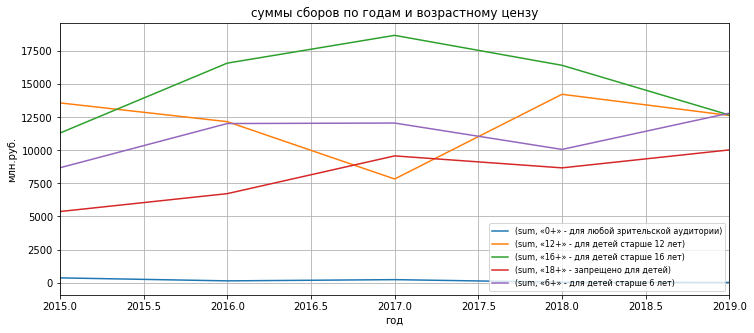

In [33]:
# отберем данные с 2015 по 2019 с данными проката
df_not_null = df[['box_office', 'age_restriction', 'show_start_date_year']].query('box_office > 0 and 2015 <= show_start_date_year <= 2019')
# данные проката округлим до миллионов
df_not_null['box_office'] = (df_not_null['box_office']/1000000).astype('int')
# построим сводную таблицу
pivot = df_not_null.pivot_table(index='show_start_date_year', columns='age_restriction', values='box_office', aggfunc=['sum'])
display(pivot)
pivot.plot(kind='line', grid=True, title='суммы сборов по годам и возрастному цензу', figsize=(12, 5))
plt.xlabel('год')
plt.ylabel('млн.руб.')
plt.legend(loc=4,prop={'size':8})
plt.show()


**Вывод:**  
Возрастные ограничения влияют на сборы. 
Фильмы/мультфильмы для 0+ с самыми низкими сборами каждый год.
Фильмы для подростков собирают больше всего, в 2017 сборов становится меньше, возможно это связано с развитием соцсетей и интернета. Сборы же для 18+ можно сказать незначительно растут на протяжении всего периода.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [34]:
# Отберем данные с наличием бюджета и сборов
df_budget = df.query('budget > 0 and box_office > 0')
# переведем в миллионы и округлим до 2 знаков
df_budget['budget'] = df_budget['budget'].apply(lambda x: round(x/1000000,2))
df_budget['box_office'] = df_budget['box_office'].apply(lambda x: round(x/1000000,2))
# посмотрим на статистические данные по бюджету
df_budget['budget'].describe()

count     318.000000
mean      132.006698
std       184.957293
min         6.000000
25%        46.150000
50%        74.955000
75%       150.007500
max      2305.070000
Name: budget, dtype: float64

Бюджет фильмов от 6 до 2305 млн.рублей, при среднем значении 132 и медиане 75млн.руб.
Посмотрим на окупаемость кино. Добавим дополнительный столбец в котором рассчитаем отношение бюджета к сборам.

In [35]:
df_budget['film_payback'] = round(df_budget['budget'] / df_budget['box_office'], 2)
df_budget['film_payback'].describe()

count    318.0000
mean          inf
std           NaN
min        0.0500
25%        1.0300
50%        5.6700
75%       42.9175
max           inf
Name: film_payback, dtype: float64

По статистическим данным видим что отношение равно 1 находится на 25%, а это значит что только 1/4 проката окупается.

count    301.000000
mean       5.999336
std        1.130811
min        1.000000
25%        5.300000
50%        6.200000
75%        6.700000
max        8.500000
Name: ratings, dtype: float64

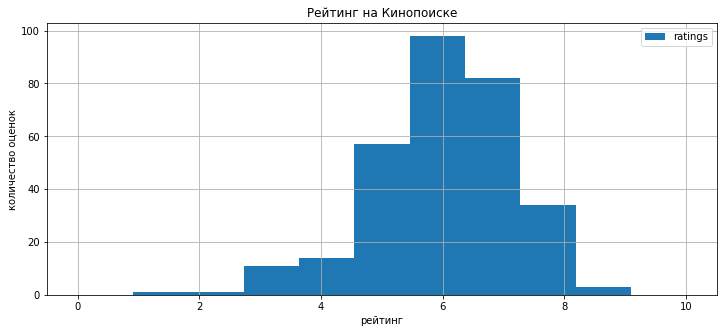

In [36]:
# посмотрим рейтинг на Кинопоиске
df_budget = df_budget.query('ratings > 0')
display(df_budget['ratings'].describe())
df_budget.plot.hist(y='ratings', grid=True, bins=11, range=(0, 10), figsize=(12, 5), title='Рейтинг на Кинопоиске')
plt.xlabel('рейтинг')
plt.ylabel('количество оценок')
plt.show()

Средний балл выставленный зрителем 6, совпадает с медианой, более 7 баллов приходится на 1/4.

### Шаг 5. Напишите общий вывод

**Данную информацию необходимо донести ответственным, за выгрузку данных:**
1) В результате подготовки данных выяснили что рейтинг содержит не корректные значения. Данные значения были очищены.  
2) Только 4% от всех данных заполнено данными по бюджетам, не везде бюджет рассчитан, пришлось пересчитать.  
3) Имеется некоторое количество некорректных данных, лишние пробелы, разный регистр. При преобразовании количество уникальных категорий сократилось.  
  
  
**В результате исследований пришли к следующим выводам:**  
1) Сборы по фильмам 0+ минимальны и движение по всему периоду никак не менялось. Сборы по подростковому кино падают, вероятнее всего потому что молодежь уходит в соц.сети и интернет. Доход по Кино 18+ немного растет. По детскому кино доход растет.  
2) С 2015 по 2019 года сборы примерно одинаковы, с 2014 был резкий скачек, возможно из-за отсутствия данных.  
3) Анализ фильмов получивших государственную поддержку показал что 25% этих фильмов получают хорошую оценку и 25% окупаются. А поддержка государства достигает от 6 до 2300 млн.руб., медиана 75млн.руб.